#### Izradio: Damir Čupić
![alt text](./Materijali/Slike/Header.png)

# "Igra godine" - pregled najboljih videoigara kroz dva desetljeća

In [1]:
#importovi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Audio, IFrame, Image, Markdown, display
from datetime import datetime

#inicijalizacija varijabli
brojac_slika = 1
zaustavi_brojac = False

img = {"empty": "dictionary"}
indeksi = {"another_empty": "dictionary"}

In [2]:
#Pozadinski Soundtrack
display(Audio(url="./Soundtrack/Track" + str(datetime.now().second%4) + ".mp3", autoplay=True))

In [19]:
#pomoćna funkcija za printanje MARKDOWN teksta u funkcijama
def markdown_print(text): display(Markdown(text)) 

#funkcija za kreairanje uniformnog okvira za slike
def ucitaj_sliku(ime, opis, stavi):
    global brojac_slika, img, indeksi
    
    #inicijalizacija
    if ime not in img:
        img[ime] = Image("./Materijali/Slike/" + ime, width=600)
        indeksi[ime] = brojac_slika
        if not zaustavi_brojac: brojac_slika = brojac_slika + 1
    
    #print dio
    if stavi:
        markdown_print(">**Slika " + str(indeksi[ime]) + ":** " + opis)
        display(img[ime])

# 1. Uvod
Ovaj esej potaknut je nedavnom vatrom koju je stvorio legendarni dvoboj igara **The Last Of Us** i **God Of War** za megaBAFTA-u:

In [15]:
ucitaj_sliku("Tweet.png","Dvoboj: The Last of Us VS God of War",True)

>**Slika 1:** Dvoboj: The Last of Us VS God of War

Stoga je naglasak upravo na **BAFTA Games** nagradi, ali i na nagrade **The Game Awards**, **Game Developer Choice Award** i **Golden Joystick Awards** u nešto manje detalje. Analogija je slična općenito popularnijim filmskim nagradama Oskar ili Zlatni Globus. U daljnjem tekstu često će se pojaviti kratica **GOTY** što znači **Game of the year** odnosno **igra godine**. Sama razrada eseja bazirat će se na podacima o igrama pobjednicama GOTY nagrada, njihovim žanrom, ekonomskim uspjehom, kreatorom te ocjenom igrača u vremenskom intervalu od **1998.** do **2018.** godine.


# 2. Pregled podataka
***
Izvori:

podaci o **broju prodanih primjeraka** igara:
https://www.kaggle.com/gregorut/videogamesales/data

podaci o **godišnje najprodavanijim** igrama:
https://en.wikipedia.org/wiki/List_of_best-selling_video_games

podaci o **GOTY nagradama**:
https://en.wikipedia.org/wiki/List_of_Game_of_the_Year_awards

**Metacritic ocjene**:
https://www.metacritic.com/game

dokumentacija za izradu grafova: https://matplotlib.org/3.1.0/gallery/index.html
***

U nastavku slijedi niz grafova čiji je cilj određivanja nekih **karakteristika** GOTY igara. Prva od njih je **popularnost**, odnosno koliko je primjeraka igre prodano.

In [5]:
#funkcija za učitavanje tablica-  argumenti: ime datoteke, indeks tablice
def ucitaj_tablicu(ime, index):
    tablica = pd.read_csv('https://raw.githubusercontent.com/0shade0/MS/master/Materijali/' + ime, encoding='ISO-8859-1')
    tablica = tablica.sort_values(index)
    tablica.set_index(index, inplace=True)
    return tablica

#tablica sa BAFTA goty naslovima
bafta = ucitaj_tablicu("goty_tablica.csv", "Year")

#tablica sa svim goty naslovima
goty = ucitaj_tablicu("goty_tablica_sve.csv", "Year")

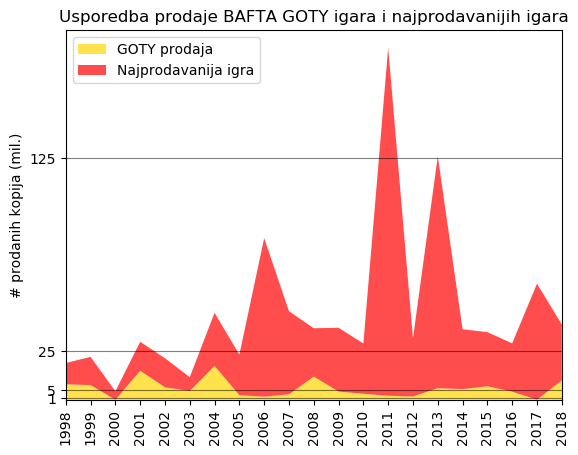

In [6]:
#graf prodanih nagrađenih igara i najprodavanijih igara po godinama
plt.rcdefaults()
fig, ax = plt.subplots()

#varijable
boje = ["gold", "red"]
legenda = ['GOTY prodaja', 'Najprodavanija igra']

#plot
ax.stackplot(range(1998, 2019), bafta['Sold'], bafta['Most Sold'], colors=boje, labels=legenda, alpha=0.7)

#postavke plota
ax.legend(loc='upper left')
ax.set_ylabel('# prodanih kopija (mil.)')
ax.set_title('Usporedba prodaje BAFTA GOTY igara i najprodavanijih igara')

#dodatne postavke
plt.xticks(range(1998, 2019), rotation='vertical')
plt.xlim(1998, 2018)
plt.yticks(np.geomspace(1, 125, 4))
plt.grid(True, 'major', 'y', color='k', linestyle='-', alpha=0.5)

plt.show()

Iz prethodnog grafa vidi se da GOTY videoigre **nisu** ujedno i najpopularnije u pripadnim godinama. Međutim, to ne znači da nisu uspješne. Uspješnost zapravo fluktuira među naslovima iz godine u godinu. Nekoliko milijuna prodanih primjeraka često se smatra velikim uspjehom. No to uveliko ovisi o budžetu. Također postoje videoigre kojima ukupni budžet raste (primjerice online videoigre koje imaju troškove održavanja servera ili izdaju redovite nadogradnje/update-ove). Još jedan faktor koji je uvijek dobro uračunati kada je riječ o ovoj vrsti nagrada je pristranost nagrađivača. Naime videoigre koje su potencijalni pobjednici nagrada u pravilu zadovoljavaju specifičnu (manju) publiku, pa stoga ona financijski zaostaje za videoigrama orijentiranim masovnoj publici.

U sljedećem grafu promatrana je popularnost prema **žanrovima**.

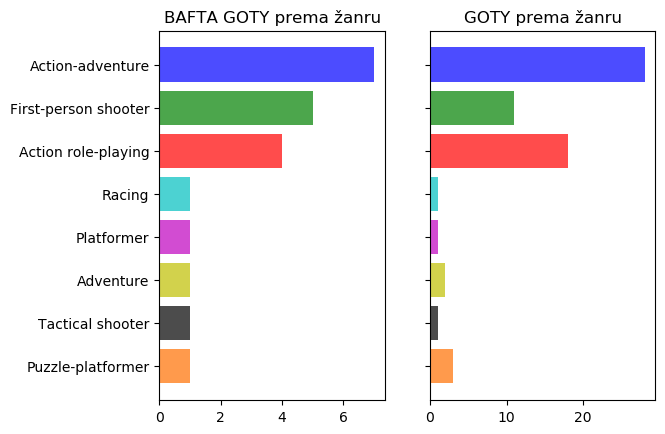

In [7]:
#graf BAFTA GOTY i ostalih+BAFTA GOTY igara prema žanru
plt.rcdefaults()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row')

#varijable
boje = ['b','g','r','c','m','y','k',"#ff7000"]
names = bafta['Genre'].value_counts().index.tolist()
values1 = np.array([len(bafta[bafta['Genre'] == val]) for val in names])
values2 = np.array([len(goty[goty['Genre'] == val]) for val in names])

#postavke grafa
ax1.barh(names, values1, color=boje, align='center', alpha=0.7)
ax1.invert_yaxis()
ax1.set_title('BAFTA GOTY prema žanru')
ax2.barh(names, values2, color=boje, align='center', alpha=0.7)
ax2.set_title('GOTY prema žanru')

plt.show()

Uvjerljivo vodstvo ima žanr **Action-adventure** dok su **First-person shooter** i **Action role-playing** također popularni pobjednici. Ovo je sasvim razumno s obzirom da su to žanrovi koji najbolje koriste hardware sposobnosti pa su brze i vizualno primamljive. Ostali žanrovi u tablici (najviše **Platformer** i **Adventure**), ali i jedan koji se ne nalazi na njoj - **Real-time strategy**, bili su popularniji u prethodnoj eri gaminga, što zbog hardwareskih ograničenja, što zbog generalno drugačijeg gaming mentaliteta, zbog čega je prihvatljvi tempo igara bio znatno sporiji, a i strpljenje igrača veće.

Slijedi popis najuspješnijih **kompanija** s ozbirom na broj GOTY nagrada.

In [8]:
#tablica broja prestižnih goty nagrada prema kreatoru
#varijable
names = goty['Developer'].value_counts().index.tolist()
values = goty['Developer'].value_counts().tolist()

#tablica
table = pd.DataFrame({'x':names, 'y':values})
table = table.shift(1).drop(table.index[0])
table.columns = ['Kreator', '# GOTY']
table['# GOTY'] = table['# GOTY'].astype(int)

display(table[:10])

,Kreator,# GOTY
1,Bethesda Game Studios,8
2,Rockstar North,6
3,Naughty Dog,5
4,BioWare,5
5,Valve,5
6,Epic Games,3
7,Nintendo EPD,3
8,SIE Santa Monica Studio,3
9,CD Projekt Red,3
10,Nintendo EAD,2


Iz tablice se vidi da **Bethesda Game Studios** uvrjerljivo vodi u ovoj kategoriji. Ovaj studio poznat je po svojim **sandbox** ("kutija s pijeskom") tipom igara u kojima igrač ima veliku slobodu odluke i kretanja. Također vrijedi spomenuti drugoplasirani **Rockstar North** koji stoji iza veoma popularnog serijala **GTA - Grand Theft Auto**, takozvanog "simulatora života", ali još više i "simulatora kriminala".

In [9]:
ucitaj_sliku("Fallout.png","Fallout 4 - igra Bethesda Game Studios-a",True)

>**Slika 2:** Fallout 4 - igra Bethesda Game Studios-a

In [10]:
ucitaj_sliku("GTA.png","GTA V - igra Rockstar North-a",True)

>**Slika 3:** GTA V - igra Rockstar North-a

Važan je čimbenik i **dojam šire publike**. To se može približno dobiti na stranici **Metacritic**, koja među raznim kategorijama također bilježi i recenzije videoigara. Sljedeći graf prikazuje te podatke.

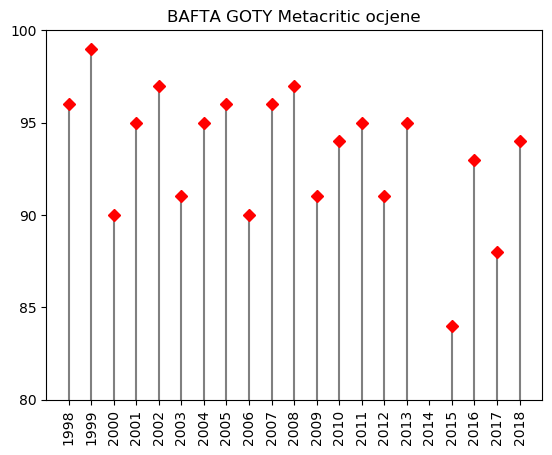

In [11]:
#graf Metacritic ocjena za BAFTA igre
plt.rcdefaults()
fig, ax = plt.subplots()

#varijable
x_axis = range(1998,2019)
y_axis = bafta['Metacritic'].tolist()

#postavke grafa
ax.stem(x_axis, y_axis,'gray', markerfmt='rD', use_line_collection=True)
ax.set_ylim(ymin=80, ymax=100)
ax.set_title('BAFTA GOTY Metacritic ocjene')

#dodatne postavke grafa
plt.xticks(range(1998, 2019), rotation='vertical')
plt.yticks(range(80,101,5))
plt.xlim(1997, 2019)

plt.show()

Iz prikaza je jasno da su GOTY nagrađene videoigre također **odlično ocijenjene**. Uz par izuzetaka, istaknuta je igra **Destiny** (2014.) koja je manje popularna među igračima, a na drugom kraju spektra stoji jedna od najbolje ocjenjenih igara **Legend of Zelda: Ocarina of Time** (1999.) koja je teško nadmašiva u očima mnogih kritičara.

In [12]:
ucitaj_sliku("Destiny.png","Destiny - dobitnik BAFTA GOTY 2014.",True)

>**Slika 4:** Destiny - dobitnik BAFTA GOTY 2014.

In [13]:
ucitaj_sliku("Ocarina.png","Legend of Zelda: Ocarina of Time - dobitnik BAFTA GOTY 1999.",True)

>**Slika 5:** Legend of Zelda: Ocarina of Time - dobitnik BAFTA GOTY 1999.

# Moja GOTY lista

# Gaming preporuka:

In [18]:
#randomizirani index preporučene igre
index = datetime.now().second%21
game_list = bafta['Game'].tolist()

global zaustavi_brojac
if not zaustavi_brojac:
    zaustavi_brojac = True

for i in range(0,len(game_list)):
    #varijable
    url = "bafta_images/image" + str(i) + ".png"
    opis = game_list[i] + " - dobitnik BAFTA GOTY " + str(1998+i) + "."

    #slika
    if i == index: ucitaj_sliku(url, opis, True)
    else : ucitaj_sliku(url, opis, False)
        
#video
markdown_print("### Trailer: ")
link = bafta['link'].tolist()[index]
display(IFrame(link, width=600, height=400))

>**Slika 6:** Call of Duty - dobitnik BAFTA GOTY 2003.

### Trailer: 